<a href="https://colab.research.google.com/github/jeffersonramelo/An-lise_DCs/blob/main/analise_empresas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lendo o arquivo

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo XLSX
file_path = '/content/Dados para Trabalho2.xlsx'
df_filtered = pd.read_excel(file_path)

Selecionar empresa

In [3]:
# Filtrar apenas as linhas onde a coluna "Nome" contém "Ambev S/A"
#df_filtered = df[df['Nome'] == 'Ambev S/A']

Estatítica Descritiva

In [12]:
# Rodar estatísticas descritivas em colunas específicas
estatisticas_descritivas = df_filtered[['LC', 'LI', 'LS', 'LG', 'ET', 'CE', 'ICP', 'IRNC', 'ROI', 'ROE', 'CGLC', 'NCGC', 'STC']].describe()

# Exibir as estatísticas descritivas
print(estatisticas_descritivas)

                LC           LI           LS           LG           ET  \
count  1039.000000  1036.000000  1036.000000  1039.000000  1039.000000   
mean      2.060250     0.496186     1.570671     1.269237     4.188598   
std       2.332352     1.854093     2.147085     1.111614    33.818054   
min       0.071749     0.000000     0.025559     0.079212    -1.841501   
25%       1.172356     0.097523     0.877031     0.694688     0.740735   
50%       1.669637     0.275295     1.201040     0.989111     1.255752   
75%       2.346611     0.551979     1.741184     1.453138     2.251348   
max      49.819273    45.191834    46.655359    10.881011   992.251354   

                CE          ICP         IRNC          ROI          ROE  \
count  1039.000000  1036.000000  1036.000000  1024.000000  1039.000000   
mean      0.478637     2.420508     0.576412     0.086694     0.050032   
std       0.196528    22.481679     0.324552     0.233620     0.389836   
min       0.059623    -0.695632    -1

Correlação

            LC        LI        LS        LG        ET        CE       ICP  \
LC    1.000000  0.322720  0.881908  0.677118 -0.503809 -0.045410 -0.640629   
LI    0.322720  1.000000  0.419566  0.011372 -0.175823 -0.282085 -0.038521   
LS    0.881908  0.419566  1.000000  0.557319 -0.475447 -0.184427 -0.529081   
LG    0.677118  0.011372  0.557319  1.000000 -0.586611  0.502440 -0.923893   
ET   -0.503809 -0.175823 -0.475447 -0.586611  1.000000 -0.208976  0.596499   
CE   -0.045410 -0.282085 -0.184427  0.502440 -0.208976  1.000000 -0.439655   
ICP  -0.640629 -0.038521 -0.529081 -0.923893  0.596499 -0.439655  1.000000   
IRNC -0.630548  0.005675 -0.526484 -0.796310  0.147795 -0.240725  0.791066   
ROI  -0.429665 -0.181945 -0.384483 -0.472847  0.623219 -0.060102  0.528316   
ROE   0.092168  0.105922  0.196150  0.108337 -0.109409  0.048756 -0.122452   
CGLC  1.000000  0.322720  0.881908  0.677118 -0.503809 -0.045410 -0.640629   
NCGC  0.651774 -0.302769  0.474415  0.575275 -0.305229  0.141108

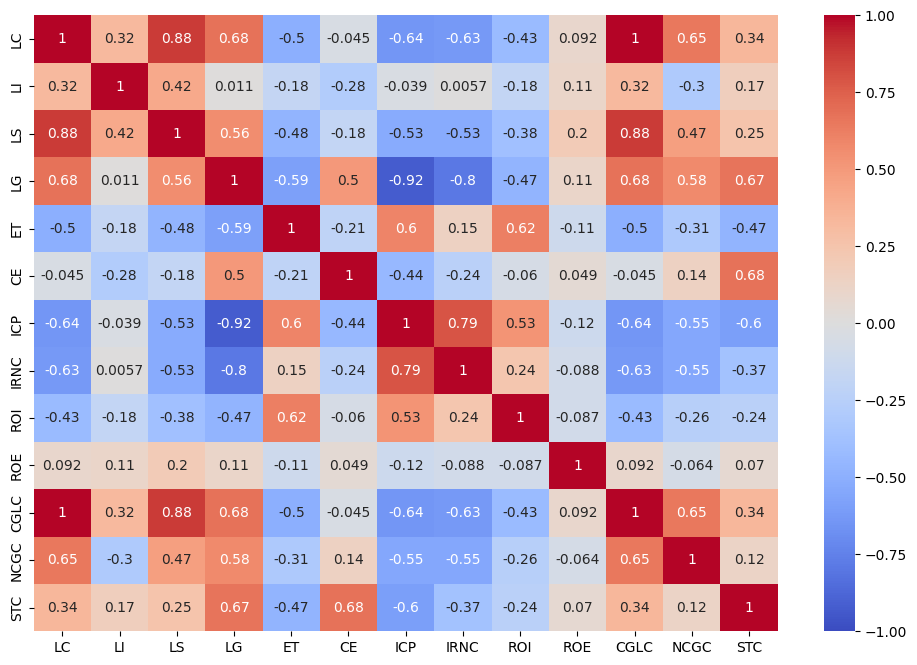

In [13]:
# Selecionar apenas as colunas mencionadas
columns_of_interest = ['LC', 'LI', 'LS', 'LG', 'ET', 'CE', 'ICP', 'IRNC', 'ROI', 'ROE', 'CGLC', 'NCGC', 'STC']
df_selected = df_filtered[columns_of_interest]

# Converter as colunas para numérico, forçando erros a serem NaN
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# Calcular a matriz de correlação de Spearman
corr_matrix = df_selected.corr(method='spearman')

# Exibir a matriz de correlação
print(corr_matrix)

# Plotar um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Modelo de regressão

In [20]:
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

# Suponha que 'dados' seja o DataFrame com suas variáveis

# Defina as variáveis independentes e dependente
X = df_selected[['LC', 'LI', 'LS', 'LG', 'ET', 'CE', 'ICP', 'IRNC', 'ROI', 'CGLC', 'NCGC', 'STC']]
y = df_selected['ROE']

# Adicione uma constante ao conjunto de variáveis independentes
X = sm.add_constant(X)

# Crie o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Visualize os resultados do modelo
print(modelo.summary())

# Calcule o MedAE
y_pred = modelo.predict(X)
medae = np.median(np.abs(y - y_pred))

# Calcule o valor médio da variável de resposta
valor_medio_y = np.mean(y)

# Calcule o MedAE escalado pelo valor (ou preço)
medae_scaled = (medae / valor_medio_y) * 100  # Em percentagem

print("Median Absolute Error (MedAE):", medae)
print("MedAE escalado pelo valor (ou preço) em percentagem:", medae_scaled)

# Calcular os VIFs (Fator de Inflação da Variância)
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

vif_result = calculate_vif(X.drop(columns=['const']))
print("\nFator de Inflação da Variância (VIF):")
print(vif_result)

# Realizar o teste de heterocedasticidade de White
white_test_result = het_white(modelo.resid, X)
print("\nResultado do teste de heterocedasticidade de White:")
print("LM Statistic:", white_test_result[0])
print("LM p-value:", white_test_result[1])
print("F Statistic:", white_test_result[2])
print("F p-value:", white_test_result[3])


                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     5.722
Date:                Mon, 20 May 2024   Prob (F-statistic):           1.27e-09
Time:                        22:40:48   Log-Likelihood:                -461.35
No. Observations:                1039   AIC:                             948.7
Df Residuals:                    1026   BIC:                             1013.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.068      0.358      0.7

Mínimos Quadrados Ponderados

In [21]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

# Suponha que 'dados_log' seja o DataFrame com suas variáveis

# Defina as variáveis independentes e dependente
X = df_selected[['LC', 'LI', 'LS', 'LG', 'ET', 'CE', 'ICP', 'IRNC', 'ROI', 'CGLC', 'NCGC', 'STC']]
y = df_selected['ROE']

# Adicione uma constante ao conjunto de variáveis independentes
X = sm.add_constant(X)

# Crie o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Calcule os resíduos (erros)
residuos = modelo.resid

# Calcule a variância dos resíduos
variancia_residuos = np.var(residuos)

# Calcule os pesos com base na variância dos resíduos (inverso da variância)
pesos = 1 / variancia_residuos

# Crie o modelo de regressão linear ponderada (WLS) com os pesos calculados
modelo_wls = sm.WLS(y, X, weights=pesos).fit()

# Visualize os resultados do modelo ponderado
print(modelo_wls.summary())

# Calcule os resíduos ponderados (erros ponderados)
y_pred_wls = modelo_wls.predict(X)
residuos_wls = y - y_pred_wls

# Calcule o MedAE ponderado
medae_wls = np.median(np.abs(residuos_wls))

# Calcule o valor médio da variável de resposta
valor_medio_y = np.mean(y)

# Calcule o MedAE ponderado escalado pelo valor (ou preço) em percentagem
medae_scaled_wls = (medae_wls / valor_medio_y) * 100  # Em percentagem

print("Median Absolute Error (MedAE) ponderado:", medae_wls)
print("MedAE ponderado escalado pelo valor (ou preço) em percentagem:", medae_scaled_wls)

# Calcular os VIFs (Fator de Inflação da Variância)
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

vif_result = calculate_vif(X.drop(columns=['const']))
print("\nFator de Inflação da Variância (VIF):")
print(vif_result)

# Realizar o teste de heterocedasticidade de White
white_test_result = het_white(modelo_wls.resid, X)
print("\nResultado do teste de heterocedasticidade de White:")
print("LM Statistic:", white_test_result[0])
print("LM p-value:", white_test_result[1])
print("F Statistic:", white_test_result[2])
print("F p-value:", white_test_result[3])


                            WLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.063
Model:                            WLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     5.722
Date:                Mon, 20 May 2024   Prob (F-statistic):           1.27e-09
Time:                        22:47:06   Log-Likelihood:                -461.35
No. Observations:                1039   AIC:                             948.7
Df Residuals:                    1026   BIC:                             1013.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.068      0.358      0.7

Quantílica

In [22]:
import statsmodels.api as sm

# Supondo que 'dados' seja o DataFrame com suas variáveis

# Defina as variáveis independentes e dependente
X = df_selected[['LC', 'LI', 'LS', 'LG', 'ET', 'CE', 'ICP', 'IRNC', 'ROI', 'CGLC', 'NCGC', 'STC']]
y = df_selected['ROE']

# Adicione uma constante ao conjunto de variáveis independentes
X = sm.add_constant(X)

# Crie o modelo de regressão quantílica
modelo = sm.QuantReg(y, X).fit(q=0.5)  # q=0.5 representa a mediana, ajuste conforme necessário

# Visualize os resultados do modelo
print(modelo.summary())
# Faça previsões com o modelo quantílico
y_pred_quantreg = modelo.predict(X)

# Calcule o MedAE para o modelo quantílico
medae_quantreg = np.median(np.abs(y - y_pred_quantreg))

# Calcule o valor médio da variável de resposta
valor_medio_y = np.mean(y)

# Calcule o MedAE escalado pelo valor (ou preço) em percentagem
medae_scaled_quantreg = (medae_quantreg / valor_medio_y) * 100  # Em percentagem

print("Median Absolute Error (MedAE) quantílico:", medae_quantreg)
print("MedAE quantílico escalado pelo valor (ou preço) em percentagem:", medae_scaled_quantreg)


                         QuantReg Regression Results                          
Dep. Variable:                    ROE   Pseudo R-squared:              0.09193
Model:                       QuantReg   Bandwidth:                     0.02634
Method:                 Least Squares   Sparsity:                       0.1260
Date:                Mon, 20 May 2024   No. Observations:                 1039
Time:                        22:48:55   Df Residuals:                     1026
                                        Df Model:                           12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0527      0.011      4.650      0.000       0.030       0.075
LC            -0.0084      0.005     -1.643      0.101      -0.019       0.002
LI            -0.0167      0.003     -5.719      0.000      -0.022      -0.011
LS             0.0267      0.005      5.245      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Média do MedAE escalado pelo valor (ou preço) em percentagem: 127.28572878554228
Média do R²: -0.3109980271528203


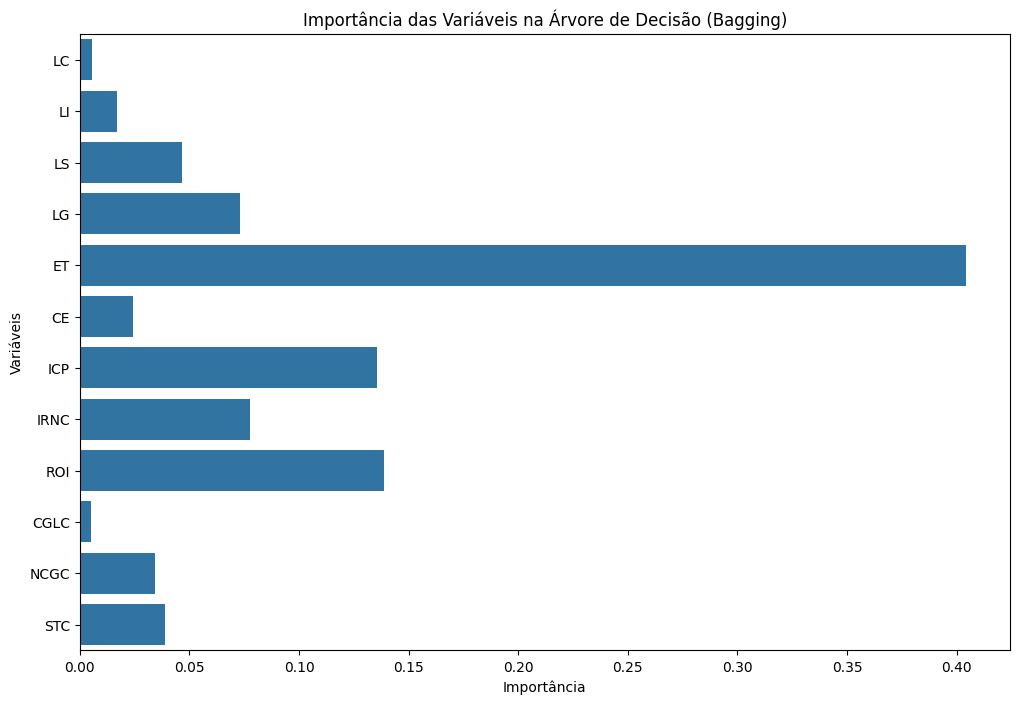

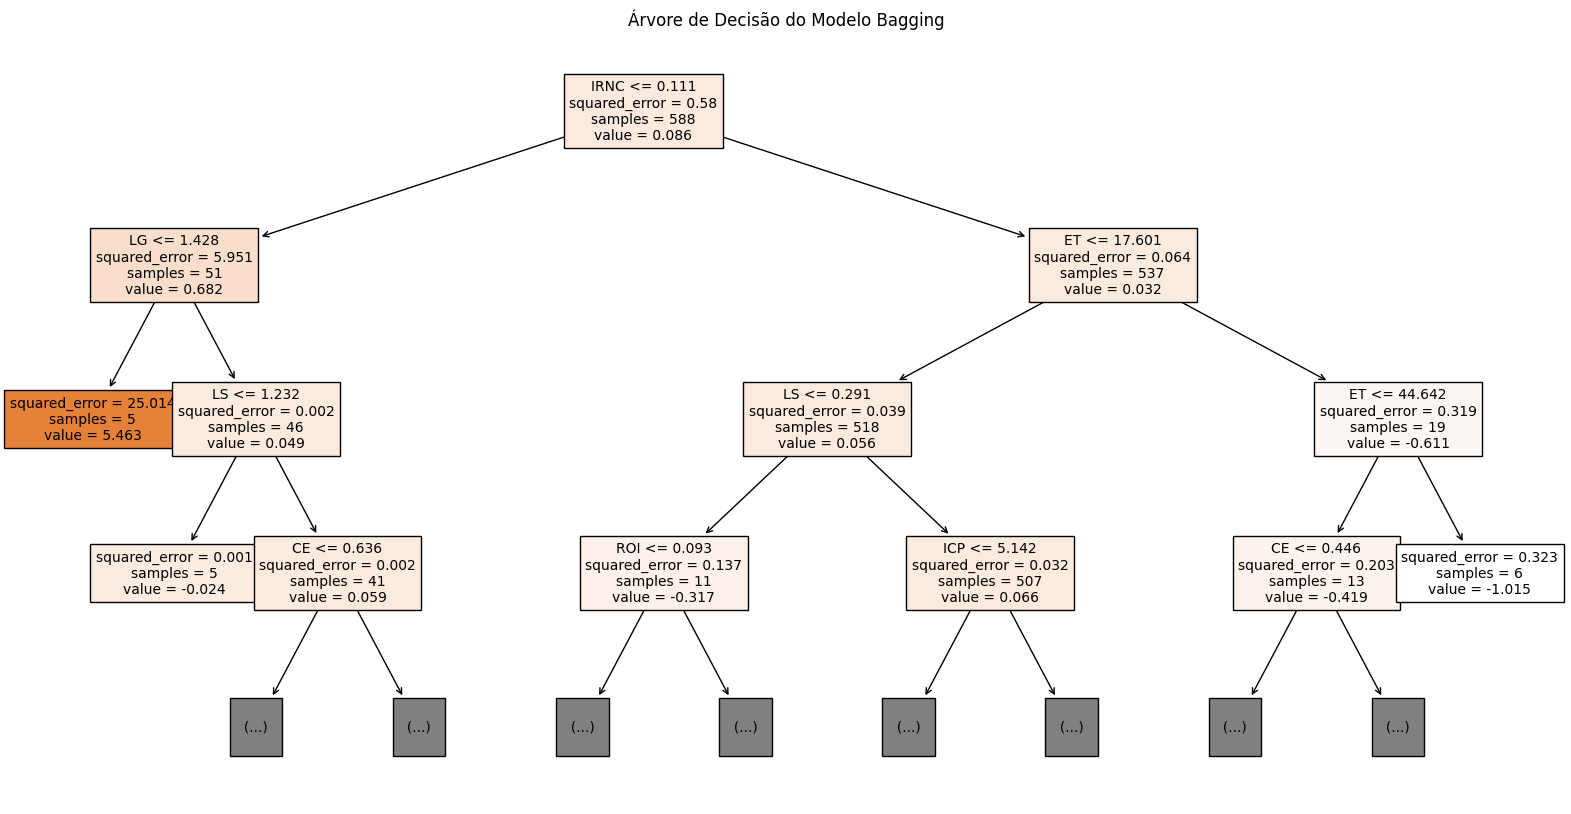

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Selecionar apenas as colunas mencionadas
columns_of_interest = ['LC', 'LI', 'LS', 'LG', 'ET', 'CE', 'ICP', 'IRNC', 'ROI', 'ROE', 'CGLC', 'NCGC', 'STC']
df_selected = df_filtered[columns_of_interest]

# Converter as colunas para numérico, forçando erros a serem NaN
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# Tratar valores ausentes (opção: preencher com a média)
df_selected = df_selected.fillna(df_selected.mean())

# Configurar X e y
X = df_selected[['LC', 'LI', 'LS', 'LG', 'ET', 'CE', 'ICP', 'IRNC', 'ROI', 'CGLC', 'NCGC', 'STC']]
y = df_selected['ROE']

# Configurar a validação cruzada com 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Listas para armazenar resultados
medae_scores = []
r2_scores = []

# Listas para armazenar a importância dos coeficientes
importancia_coeficientes_list = []

# Treinar e avaliar o modelo dentro da amostra usando validação cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Criar o modelo de árvore de decisão com os parâmetros desejados
    modelo_arvore = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=5, max_depth=5, random_state=42)

    # Criar o modelo Bagging com 500 árvores
    bagging_model = BaggingRegressor(base_estimator=modelo_arvore, n_estimators=500, bootstrap=True, random_state=42)

    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)

    # Calcular o MedAE escalado pelo valor (ou preço) em percentagem
    medae = np.median(np.abs(y_test - y_pred))
    valor_medio_y = np.mean(y_test)
    medae_scaled = (medae / valor_medio_y) * 100  # Em percentagem
    medae_scores.append(medae_scaled)

    # Calcular o R²
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Visualizar a importância dos coeficientes (importância das variáveis)
    importancia_coeficientes = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)
    importancia_coeficientes_list.append(importancia_coeficientes)

# Média do MedAE escalado pelo valor (ou preço) em percentagem
mean_medae_scaled = np.mean(medae_scores)
print("Média do MedAE escalado pelo valor (ou preço) em percentagem:", mean_medae_scaled)

# Média do R²
mean_r2 = np.mean(r2_scores)
print("Média do R²:", mean_r2)

# Média da importância dos coeficientes
mean_importancia_coeficientes = np.mean(importancia_coeficientes_list, axis=0)

# Plotar a importância das variáveis
features = X.columns
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_importancia_coeficientes, y=features)
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis na Árvore de Decisão (Bagging)')
plt.show()

# Visualizar uma das árvores de decisão do modelo Bagging
plt.figure(figsize=(20, 10))
tree.plot_tree(bagging_model.estimators_[0], feature_names=features, filled=True, fontsize=10, max_depth=3)  # Ajuste a profundidade da árvore para visualização
plt.title('Árvore de Decisão do Modelo Bagging')
plt.show()


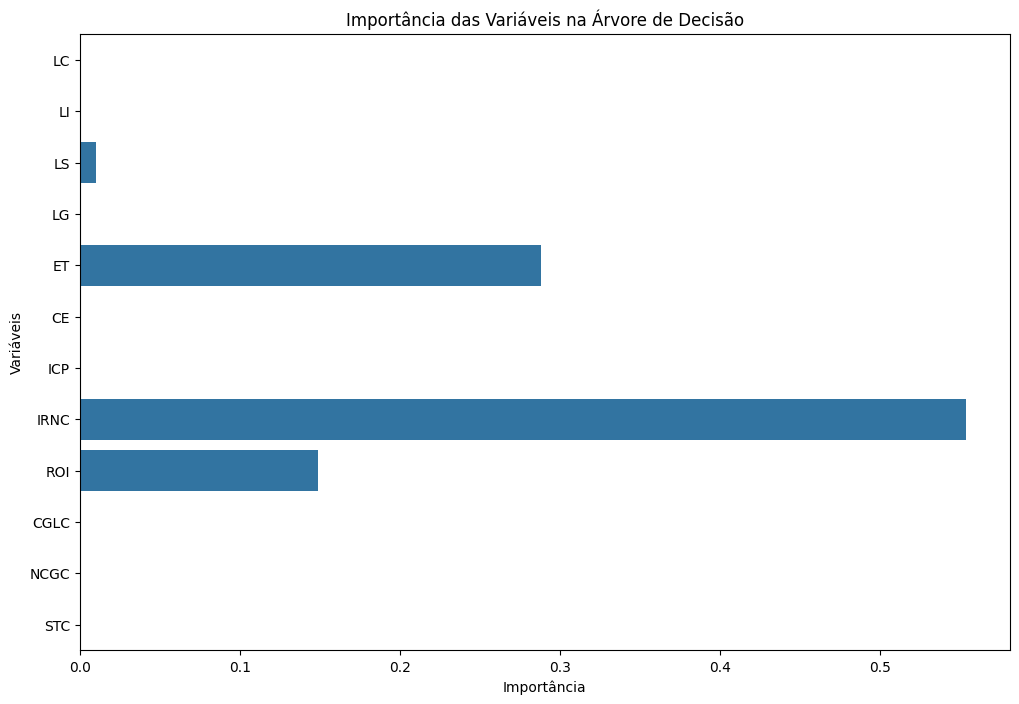

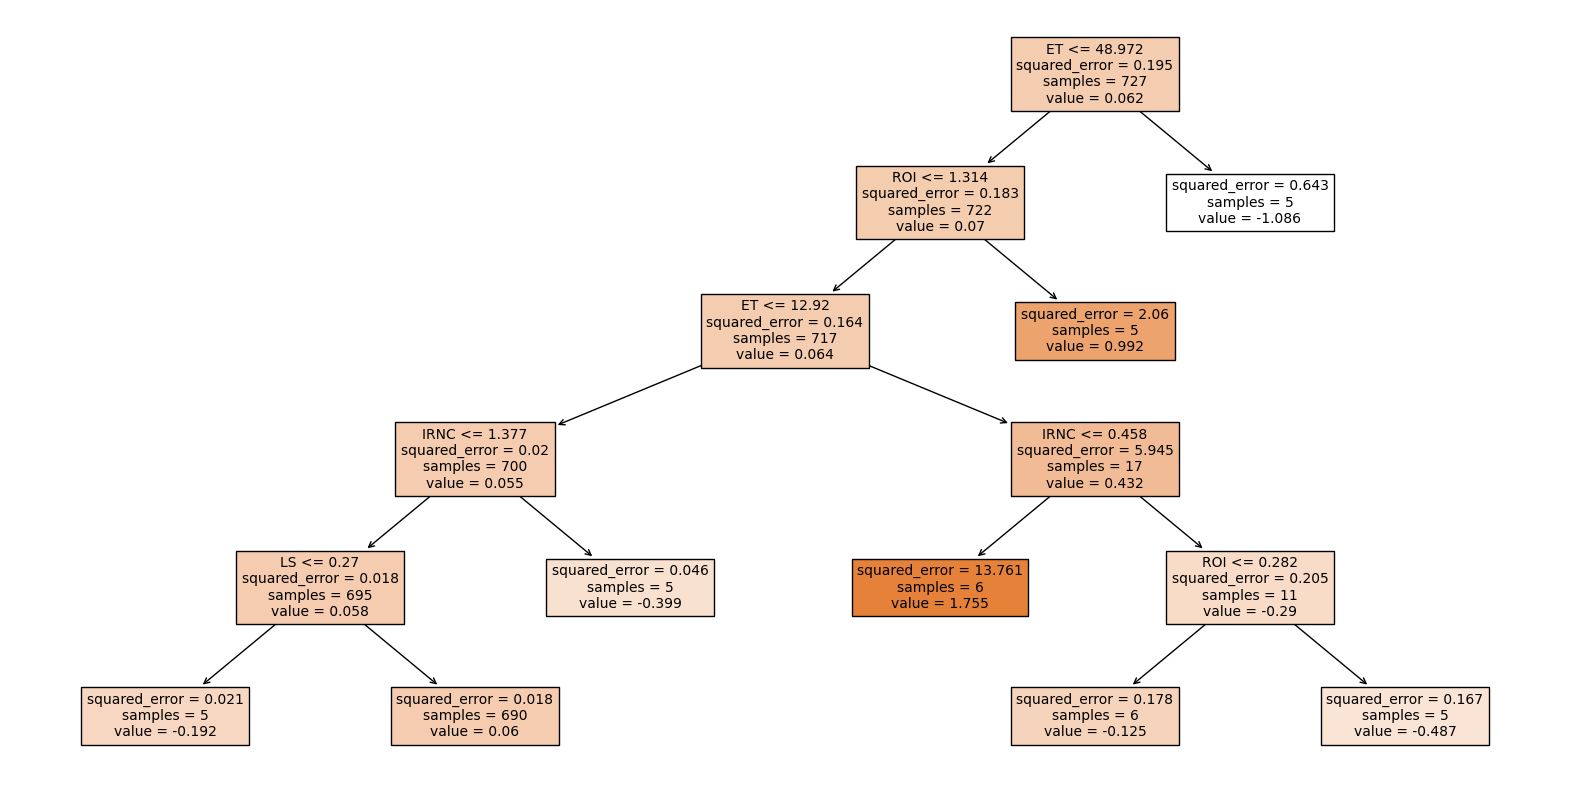

In [15]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree

# Converter as colunas para numérico, forçando erros a serem NaN
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# Tratar valores ausentes (opção: preencher com a média)
df_selected = df_selected.fillna(df_selected.mean())

# Dividir os dados em conjuntos de treino e teste
X = df_selected.drop(columns=['ROE'])
y = df_selected['ROE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar a árvore de decisão com parâmetros ajustados
model = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)

# Visualizar a importância das variáveis
feature_importance = model.feature_importances_
features = X.columns

# Plotar a importância das variáveis
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis na Árvore de Decisão')
plt.show()

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=features, filled=True, fontsize=10)
plt.show()
